Theoratical

1. Can we use Bagging for regression problems?


Yes, Bagging can be used for regression problems. It works by training multiple regressors on different subsets of the training data (created using bootstrap sampling) and averaging their predictions. Example: Bagging Regressor in scikit-learn.



2. What is the difference between multiple model training and single model training?


Single Model Training: Involves training a single model on the entire training dataset.
Multiple Model Training: Involves training several models (often of the same type) on different subsets of the data and combining their predictions to improve robustness and accuracy. This approach reduces overfitting and increases generalization.

3. Explain the concept of feature randomness in Random Forest.
In a Random Forest, when constructing each decision tree, a random subset of features is selected at each split point. This randomness:

Reduces correlation between trees.
Improves model robustness and generalization.
Ensures that no single feature dominates the model.


4. What is OOB (Out-of-Bag) Score?

OOB Score: A performance estimate of a Bagging model obtained by evaluating the model on samples not included in the bootstrap sample.
Why Useful: Acts as a form of cross-validation, providing an unbiased estimate of model performance.

5. How can you measure the importance of features in a Random Forest model?

Feature Importance: Measured by observing the decrease in the model’s performance (e.g., Gini impurity or MSE) when a particular feature is randomly shuffled.
Higher Decrease: Means the feature is more important.
Also calculated by averaging the reduction of impurity (Gini or entropy) brought by each feature across all trees.

6. Explain the working principle of a Bagging Classifier.
Creates multiple bootstrap samples from the original dataset.
Trains multiple models (usually Decision Trees) on these samples.
Combines predictions by majority voting (classification) or averaging (regression).
Reduces overfitting and variance by aggregating results from independent models.

7. How do you evaluate a Bagging Classifier’s performance?

Using metrics like Accuracy, Precision, Recall, F1-score (for classification).
Cross-validation or OOB Score can be used to validate performance.
Comparing results with base models to check improvement.

8. How does a Bagging Regressor work?

Works similarly to a Bagging Classifier but targets regression problems.
Combines predictions by averaging rather than voting.
Helps reduce variance and improve model stability.

9. What is the main advantage of ensemble techniques?

Improved Generalization: By combining multiple models, ensemble techniques reduce overfitting and variance.
Better Performance: They often outperform individual models by leveraging their strengths and compensating for weaknesses.

10. What is the main challenge of ensemble methods?

Increased Complexity: Training multiple models requires more computational power and memory.
Interpretability: Models like Random Forests and Bagging are harder to interpret compared to simpler models like Decision Trees.

11. Explain the key idea behind ensemble techniques.

Combining predictions from multiple models to produce a more robust and accurate model.
The key is to ensure diversity among the models to reduce overall errors.

12. What is a Random Forest Classifier?

An ensemble method based on Bagging.
Uses multiple Decision Trees, each trained on a random subset of the data and features.
Combines predictions using majority voting (classification) or averaging (regression).
Improves robustness and reduces overfitting.

13. What are the main types of ensemble techniques?


Bagging (Bootstrap Aggregating): Reduces variance by training multiple models independently.
Boosting: Reduces bias by training models sequentially, where each new model corrects errors of the previous one.
Stacking: Combines predictions from different models by training a meta-model on their outputs.

14. What is ensemble learning in machine learning?

A technique where multiple models (weak learners) are trained and combined to achieve better predictive performance than any single model.
Commonly used in Random Forests, AdaBoost, Gradient Boosting, etc.

15. When should we avoid using ensemble methods?

When interpretability is a priority.
When computational resources are limited.
For very simple tasks, where a single model performs well enough.

16. How does Bagging help in reducing overfitting?

By reducing variance.
Multiple models are trained on different subsets of data, making them less likely to overfit the training data.
The final prediction is an aggregate of all models, resulting in a smoother and more generalized decision boundary.

17. Why is Random Forest better than a single Decision Tree?

Higher accuracy and robustness.
Reduced overfitting: Trees are trained on random subsets of data and features.
More generalized performance: Majority voting/averaging prevents extreme predictions.

18. What is the role of bootstrap sampling in Bagging?

Bootstrap Sampling: Randomly selects samples from the original dataset with replacement.
Purpose: Provides diversity among models by training each model on a slightly different dataset.
Helps in generating independent models which, when combined, reduce variance.

19. What are some real-world applications of ensemble techniques?

Fraud detection.
Recommendation systems.
Medical diagnosis.
Stock price prediction.
Image and speech recognition.


20. What is the difference between Bagging and Boosting?

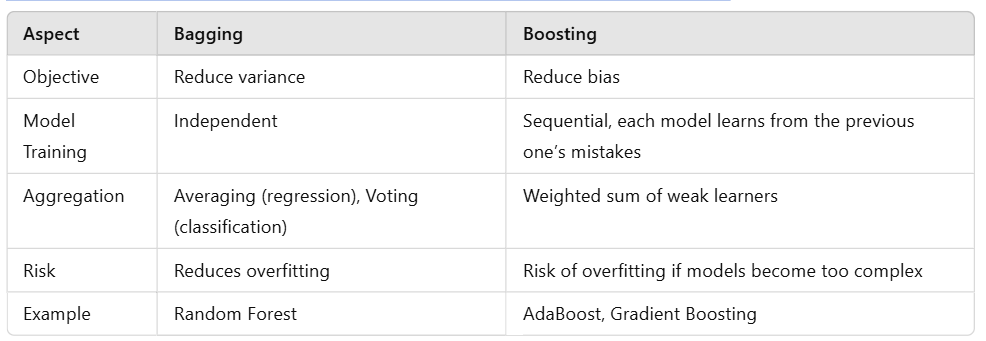

# practical q21 to 30

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, roc_auc_score

# Loading Breast Cancer dataset for classification
cancer_data = load_breast_cancer()
X, y = cancer_data.data, cancer_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TASK 1: Bagging Classifier with Decision Trees
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bag_clf = bagging_clf.predict(X_test)
bagging_clf_accuracy = accuracy_score(y_test, y_pred_bag_clf)
print('Bagging Classifier Accuracy (Decision Trees):', bagging_clf_accuracy)

# TASK 2: Bagging Regressor with Decision Trees (Using synthetic data)
np.random.seed(42)
X_reg = np.random.rand(100, 5)
y_reg = X_reg @ np.array([1.5, -2.0, 1.0, 0.5, 2.0]) + np.random.randn(100) * 0.1

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
bagging_reg.fit(X_train_reg, y_train_reg)
y_pred_bag_reg = bagging_reg.predict(X_test_reg)
bagging_reg_mse = mean_squared_error(y_test_reg, y_pred_bag_reg)
print('Bagging Regressor MSE (Decision Trees):', bagging_reg_mse)

# TASK 3: Random Forest Classifier (Breast Cancer Dataset)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)
rf_clf.fit(X_train, y_train)

feature_importances = rf_clf.feature_importances_
important_features = pd.Series(feature_importances, index=cancer_data.feature_names).sort_values(ascending=False)

print('Random Forest Classifier - Feature Importances:')
print(important_features)

# Printing Out-of-Bag Score
print('Random Forest Classifier - OOB Score:', rf_clf.oob_score_)

# TASK 4: Bagging Classifier using SVM
bagging_svm = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=42)
bagging_svm.fit(X_train, y_train)
y_pred_bag_svm = bagging_svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_bag_svm)
print('Bagging Classifier Accuracy (SVM):', svm_accuracy)

# TASK 5: Bagging Classifier using Logistic Regression
bagging_logreg = BaggingClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=10, random_state=42)
bagging_logreg.fit(X_train, y_train)
y_pred_bag_logreg = bagging_logreg.predict(X_test)
auc_score = roc_auc_score(y_test, y_pred_bag_logreg)
print('Bagging Classifier AUC Score (Logistic Regression):', auc_score)

# TASK 6: Random Forest Regressor (Comparing with Decision Tree Regressor)
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train_reg, y_train_reg)
dt_regressor_pred = dt_regressor.predict(X_test_reg)
dt_regressor_mse = mean_squared_error(y_test_reg, dt_regressor_pred)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)
rf_regressor_pred = rf_regressor.predict(X_test_reg)
rf_regressor_mse = mean_squared_error(y_test_reg, rf_regressor_pred)

print('Decision Tree Regressor MSE:', dt_regressor_mse)
print('Random Forest Regressor MSE:', rf_regressor_mse)

# TASK 7: Ensemble Model Comparison (Bagging vs Random Forest)
ensemble_models = {
    'Bagging Classifier (Decision Trees)': bagging_clf,
    'Random Forest Classifier': rf_clf
}

for name, model in ensemble_models.items():
    accuracy = model.score(X_test, y_test)
    print(f'{name} Accuracy: {accuracy}')


Bagging Classifier Accuracy (Decision Trees): 0.956140350877193
Bagging Regressor MSE (Decision Trees): 0.10699044385617354
Random Forest Classifier - Feature Importances:
worst area                 0.153892
worst concave points       0.144663
mean concave points        0.106210
worst radius               0.077987
mean concavity             0.068001
worst perimeter            0.067115
mean perimeter             0.053270
mean radius                0.048703
mean area                  0.047555
worst concavity            0.031802
area error                 0.022407
worst texture              0.021749
worst compactness          0.020266
radius error               0.020139
mean compactness           0.013944
mean texture               0.013591
perimeter error            0.011303
worst smoothness           0.010644
worst symmetry             0.010120
concavity error            0.009386
mean smoothness            0.007285
fractal dimension error    0.005321
compactness error          0.005253


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Bagging Classifier AUC Score (Logistic Regression): 0.9464461185718965
Decision Tree Regressor MSE: 0.4846746749096787
Random Forest Regressor MSE: 0.11023287601400453
Bagging Classifier (Decision Trees) Accuracy: 0.956140350877193
Random Forest Classifier Accuracy: 0.9649122807017544


# Q 31 - 45

31

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load data
bc_data = load_breast_cancer()
X_bc, y_bc = bc_data.data, bc_data.target
X_train, X_test, y_train, y_test = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

# Define the model
rf_clf = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model and results
best_rf_clf = grid_search.best_estimator_
y_pred = best_rf_clf.predict(X_test)

print("Best Hyperparameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



32

In [7]:
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load data
housing = fetch_california_housing()
X_housing, y_housing = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)

# Compare performance with different estimators
for n_estimators in [10, 50, 100]:
    bagging_reg = BaggingRegressor(n_estimators=n_estimators, random_state=42)
    bagging_reg.fit(X_train, y_train)
    y_pred = bagging_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Bagging Regressor with {n_estimators} estimators - MSE: {mse:.4f}')


Bagging Regressor with 10 estimators - MSE: 0.2824
Bagging Regressor with 50 estimators - MSE: 0.2573
Bagging Regressor with 100 estimators - MSE: 0.2559


33


Q33 - Number of Misclassified Samples: 4
Random Forest Classifier Accuracy: 0.9649122807017544

Q34 - Decision Tree Classifier Accuracy: 0.9473684210526315
Bagging Classifier Accuracy: 0.956140350877193


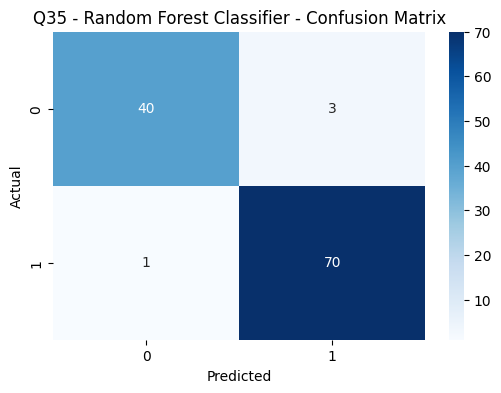

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Q36 - Stacking Classifier Accuracy: 0.9649122807017544

Q37 - Top 5 Most Important Features:
Feature 1: worst area - Importance: 0.1539
Feature 2: worst concave points - Importance: 0.1447
Feature 3: mean concave points - Importance: 0.1062
Feature 4: worst radius - Importance: 0.0780
Feature 5: mean concavity - Importance: 0.0680

Q38 - Bagging Classifier Performance Metrics:
Precision: 0.9583333333333334
Recall: 0.971830985915493
F1-Score: 0.965034965034965

Q39 - Random Forest Classifier Accuracy (max_depth=3): 0.9649122807017544

Q39 - Random Forest Classifier Accuracy (max_depth=5): 0.9649122807017544

Q39 - Random Forest Classifier Accuracy (max_depth=7): 0.9649122807017544

Q39 - Random Forest Classifier Accuracy (max_depth=10): 0.9649122807017544

Q39 - Random Forest Classifier Accuracy (max_depth=None): 0.9649122807017544

Q40 - Bagging Regressor with DecisionTree - MSE: 0.25592438609899626

Q40 - Bagging Regressor with KNeighbors - MSE: 1.0763195397322207


In [12]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load classification dataset (Breast Cancer)
bc_data = load_breast_cancer()
X, y = bc_data.data, bc_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Q33: Train a Random Forest Classifier and Analyze Misclassified Samples
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
misclassified_samples = X_test[y_test != y_pred_rf]
misclassified_labels = y_test[y_test != y_pred_rf]
print("\nQ33 - Number of Misclassified Samples:", len(misclassified_samples))
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))

# Q34: Train a Bagging Classifier and Compare with Single Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print("\nQ34 - Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_tree))

bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bagging))

# Q35: Train a Random Forest Classifier and Visualize Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Q35 - Random Forest Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Q36: Train a Stacking Classifier (Decision Tree, SVM, Logistic Regression)
stacking_clf = StackingClassifier(estimators=[
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
], final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)
print("\nQ36 - Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred_stacking))

# Q37: Print Top 5 Most Important Features (Random Forest)
feature_importances = rf_clf.feature_importances_
top_features = np.argsort(feature_importances)[-5:][::-1]
print("\nQ37 - Top 5 Most Important Features:")
for i, feature_index in enumerate(top_features):
    print(f"Feature {i + 1}: {bc_data.feature_names[feature_index]} - Importance: {feature_importances[feature_index]:.4f}")

# Q38: Bagging Classifier - Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred_bagging)
recall = recall_score(y_test, y_pred_bagging)
f1 = f1_score(y_test, y_pred_bagging)
print("\nQ38 - Bagging Classifier Performance Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Q39: Analyze Effect of max_depth on Random Forest Classifier
depths = [3, 5, 7, 10, None]
for depth in depths:
    rf_depth_clf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    rf_depth_clf.fit(X_train, y_train)
    depth_accuracy = accuracy_score(y_test, rf_depth_clf.predict(X_test))
    print(f"\nQ39 - Random Forest Classifier Accuracy (max_depth={depth}):", depth_accuracy)

# Load regression dataset (California Housing)
housing_data = fetch_california_housing()
X_reg, y_reg = housing_data.data, housing_data.target
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Q40: Compare Performance of Bagging Regressor with Different Base Estimators
regressors = {
    "DecisionTree": DecisionTreeRegressor(),
    "KNeighbors": KNeighborsRegressor()
}

for name, model in regressors.items():
    bagging_reg = BaggingRegressor(estimator=model, n_estimators=100, random_state=42)
    bagging_reg.fit(X_reg_train, y_reg_train)
    y_reg_pred = bagging_reg.predict(X_reg_test)
    mse = np.mean((y_reg_pred - y_reg_test) ** 2)
    print(f"\nQ40 - Bagging Regressor with {name} - MSE:", mse)


# 41 to 45

ROC-AUC Score: 0.9244493882091211
Cross-Validation Accuracy Scores: [0.915 0.895 0.89  0.88  0.855]
Mean CV Accuracy: 0.8870000000000001


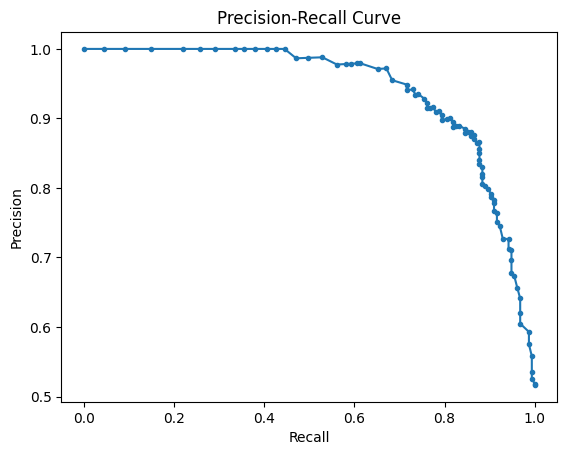

Stacking Classifier Accuracy: 0.8566666666666667
Bagging Regressor with 50 samples - MSE: 9941.944646127658


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, BaggingRegressor, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, accuracy_score, mean_squared_error
import matplotlib.pyplot as plt

# Generate a synthetic dataset for classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_proba = rf_clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")

# 42. Train a Bagging Classifier and evaluate its performance using cross-validation
bagging_clf = BaggingClassifier(estimator=RandomForestClassifier(random_state=42), n_estimators=10, random_state=42)
cv_scores = cross_val_score(bagging_clf, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")

# 43. Train a Random Forest Classifier and plot the Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# 44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Classifier Accuracy: {accuracy_stacking}")

# 45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance
# Generate a synthetic dataset for regression
X_reg, y_reg = make_regression(n_samples=1000, n_features=20, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

bootstrap_samples = [50, 100, 200]
for n_samples in bootstrap_samples:
    bagging_reg = BaggingRegressor(estimator=RandomForestRegressor(random_state=42), n_estimators=n_samples, random_state=42)
    bagging_reg.fit(X_train_reg, y_train_reg)
    y_pred_reg = bagging_reg.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    print(f"Bagging Regressor with {n_samples} samples - MSE: {mse}")